In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("C:\\Users\Dell\Desktop\BACKTEST.xlsx")
df

,EXPIRY(1st Nearby),Date,24uy7,Open Price,High Price,Low Price,Close Price,Cumulative return,Unnamed: 8,EXPIRY(2nd Nearby),...,High Price.1,Low Price.1,Close Price.1,Cumulative return.1,Unnamed: 17,Unnamed: 18,EXPIRY(1st Nearby).1,EXPIRY(2nd Nearby).1,Cumulative return.2,Cumulative return.3
0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-20,20-Apr-07,1st nearby,2nd nearby
1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-20,2007-05-18 00:00:00,NaN,NaN
2,2007-03-20,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Apr-2007,...,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-18,2007-06-20 00:00:00,NaN,NaN
3,NaT,2007-03-19,867.4,873.0,873.0,851.0,858.4,1.064484,NaN,NaN,...,762.0,743.0,758.0,1.019091,NaN,NaN,2007-06-20,2007-07-20 00:00:00,1.06448,1.01909
4,NaT,2007-03-17,864.4,871.4,879.8,860.2,867.4,NaN,NaN,NaN,...,770.0,761.0,764.6,NaN,NaN,NaN,2007-07-20,2007-08-20 00:00:00,1.09251,1.10398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,NaT,2019-09-26,1906.0,1910.0,1925.0,1907.0,1917.0,NaN,NaN,NaN,...,0.0,0.0,1917.5,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3106,NaT,2019-09-25,1904.5,0.0,0.0,0.0,1906.0,NaN,NaN,NaN,...,0.0,0.0,1916.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3107,NaT,2019-09-24,1905.5,0.0,0.0,0.0,1904.5,NaN,NaN,NaN,...,0.0,0.0,1915.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3108,NaT,2019-09-23,1920.0,0.0,0.0,0.0,1905.5,NaN,NaN,NaN,...,0.0,0.0,1916.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [ ]:
import numpy as np
x = np.arange(1,114,1)
dfreturn1 = pd.DataFrame()
dfreturn2 = pd.DataFrame()
dfexpiry1 = pd.DataFrame()
dfexpiry2 = pd.DataFrame()
dfreturn1["a"] = df["Cumulative return"]
dfreturn1.dropna(inplace = True)
dfreturn1.reset_index(drop = True, inplace = True)
dfreturn2["b"] = df["Cumulative return.1"]
dfreturn2.dropna(inplace = True)
dfreturn2.reset_index(drop = True, inplace = True)
dfexpiry1["c"] = df["EXPIRY(1st Nearby)"]
dfexpiry1.dropna(inplace = True)
dfexpiry1.reset_index(drop = True, inplace = True)
dfexpiry2["d"] = df["EXPIRY(2nd Nearby)"]
dfexpiry2.dropna(inplace = True)
dfexpiry2.reset_index(drop = True, inplace = True)

In [ ]:
dffinal = pd.DataFrame()

In [ ]:
dffinal["Expiry1"] = dfexpiry1["c"]
dffinal["Cumulative Return 1"] = dfreturn1["a"]
dffinal["Expiry2"] = dfexpiry2["d"]
dffinal["Cumulative Return 2"] = dfreturn2["b"]


In [ ]:
dffinal["Expiry2"] = pd.DatetimeIndex(dffinal.Expiry2).normalize()
dffinal

,Expiry1,Cumulative Return 1,Expiry2,Cumulative Return 2
0,2007-03-20,1.064484,2007-04-20,1.019091
1,2007-04-20,1.092510,2007-05-18,1.103977
2,2007-05-18,0.900282,2007-06-20,0.905547
3,2007-06-20,0.966675,2007-07-20,0.990387
4,2007-07-20,1.098352,2007-08-20,1.076559
...,...,...,...,...
108,2019-06-20,0.993521,2019-07-19,0.970050
109,2019-07-19,1.003265,2019-08-20,0.989727
110,2019-08-20,1.005708,2019-09-20,1.008563
111,2019-09-20,1.016845,2019-10-18,1.008448


## Columns = 10mthproduct1 / LookbackPeriod1 & 10mthproduct2 / LookbackPeriod2 
### They contain the 10 month rolling product of cumulative returns for the 1st and 2nd nearby respectively, acting as the observation period/ look-back period for our strategy
## Columns = NextMth_HoldingPeriodReturn_1 & NextMth_HoldingPeriodReturn_2 
### Returns of Holding Period of each nearby 
## Columns = Position1 & Position2
### We now have the lookback period data. From that, if the 10 month rolling product of returns on 1st nearby is greater than 2nd nearby, we go long on 1st nearby and short on 2nd nearby and vice-versa. 
## Columns = LongLeg & ShortLeg 
### Holding Period Returns on the nearby we chose to go long / short on

In [ ]:
dffinal["10mthproduct1 / LookbackPeriod1"] = 0 
dffinal["10mthproduct2 / LookbackPeriod2"] = 0 
dffinal["NextMth_HoldingPeriodReturn_1"] = 0 
dffinal["NextMth_HoldingPeriodReturn_2"] = 0 
dffinal["Position1"] = None
dffinal["Position2"] = None

for i in range(10,113):
    dffinal.loc[[i-1],["10mthproduct1 / LookbackPeriod1"]] = dffinal.iloc[i-10:i,1].prod()
    dffinal.loc[[i-1],["10mthproduct2 / LookbackPeriod2"]] = dffinal.iloc[i-10:i,3].prod()
for j in range(1,112):
    if (dffinal.iloc[j,4]) != 0:
        dffinal.loc[[j],["NextMth_HoldingPeriodReturn_1"]] = dffinal.iloc[j+1,1] 
        dffinal.loc[[j],["NextMth_HoldingPeriodReturn_2"]] = dffinal.iloc[j+1,3] 
dffinal["Position1"] = np.where(dffinal["10mthproduct1 / LookbackPeriod1"] > dffinal["10mthproduct2 / LookbackPeriod2"], "Long", "Short") 
dffinal["Position2"] = np.where(dffinal["10mthproduct1 / LookbackPeriod1"] > dffinal["10mthproduct2 / LookbackPeriod2"], "Short", "Long") 
dffinal["LongLeg"] = np.where(dffinal["Position1"] == "Long", dffinal["NextMth_HoldingPeriodReturn_1"], dffinal["NextMth_HoldingPeriodReturn_2"]) 
dffinal["ShortLeg"] = np.where(dffinal["Position1"] == "Short", dffinal["NextMth_HoldingPeriodReturn_1"], dffinal["NextMth_HoldingPeriodReturn_2"]) 
dffinal[9:]

,Expiry1,Cumulative Return 1,Expiry2,Cumulative Return 2,10mthproduct1 / LookbackPeriod1,10mthproduct2 / LookbackPeriod2,NextMth_HoldingPeriodReturn_1,NextMth_HoldingPeriodReturn_2,Position1,Position2,LongLeg,ShortLeg
9,2008-04-17,0.962075,2008-05-20,0.918312,1.626808,1.325577,1.169399,1.121091,Long,Short,1.169399,1.121091
10,2008-05-20,1.169399,2008-06-20,1.121091,1.787145,1.458253,1.075567,1.063940,Long,Short,1.075567,1.063940
11,2008-06-20,1.075567,2008-07-18,1.063940,1.759429,1.405367,0.949712,0.953635,Long,Short,0.949712,0.953635
12,2008-07-18,0.949712,2008-08-20,0.953635,1.856032,1.479998,0.941222,0.883306,Long,Short,0.941222,0.883306
13,2008-08-20,0.941222,2008-09-19,0.883306,1.807161,1.319979,1.012710,0.985863,Long,Short,1.012710,0.985863
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2019-06-20,0.993521,2019-07-19,0.970050,1.294290,1.151976,1.003265,0.989727,Long,Short,1.003265,0.989727
109,2019-07-19,1.003265,2019-08-20,0.989727,1.221312,1.081268,1.005708,1.008563,Long,Short,1.005708,1.008563
110,2019-08-20,1.005708,2019-09-20,1.008563,1.202293,1.074967,1.016845,1.008448,Long,Short,1.016845,1.008448
111,2019-09-20,1.016845,2019-10-18,1.008448,1.214411,1.039086,1.090365,1.088258,Long,Short,1.090365,1.088258


In [ ]:
import matplotlib.pyplot as plt

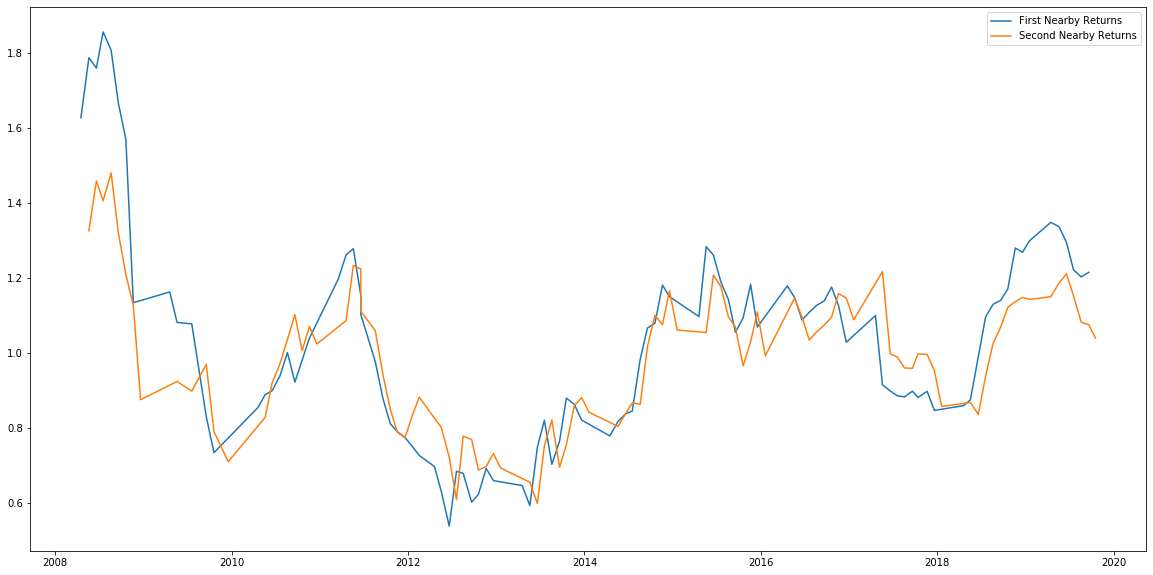

In [ ]:
fig= plt.figure(figsize=(20,10))
plt.plot(dffinal[9:112]["Expiry1"],dffinal[9:112]["10mthproduct1 / LookbackPeriod1"], label = "First Nearby Returns")
plt.plot(dffinal[9:112]["Expiry2"],dffinal[9:112]["10mthproduct2 / LookbackPeriod2"], label = "Second Nearby Returns")
plt.legend()

In [ ]:
print("Returns of the First Nearby:", (dffinal[9:112]["NextMth_HoldingPeriodReturn_1"].product() - 1) * 100 , "%")
print("Standard Deviation of First Nearby:", np.std( dffinal[9:112]["NextMth_HoldingPeriodReturn_1"]))
print("Mean Returns of the Second Nearby:", (dffinal[9:112]["NextMth_HoldingPeriodReturn_2"].product() - 1) * 100, "%")
print("Standard Deviation of Second Nearby:", np.std( dffinal[9:112]["NextMth_HoldingPeriodReturn_2"]))
print("Correlation in returns of 2 nearbys", dffinal[9:112]["NextMth_HoldingPeriodReturn_1"].corr(dffinal[9:112]["NextMth_HoldingPeriodReturn_2"]) * 100, "%")

Returns of the First Nearby: -17.2005838698469 %
Standard Deviation of First Nearby: 0.06125777196378963
Mean Returns of the Second Nearby: -28.838815428545338 %
Standard Deviation of Second Nearby: 0.06136764416590057
Correlation in returns of 2 nearbys 92.65551924169596 %


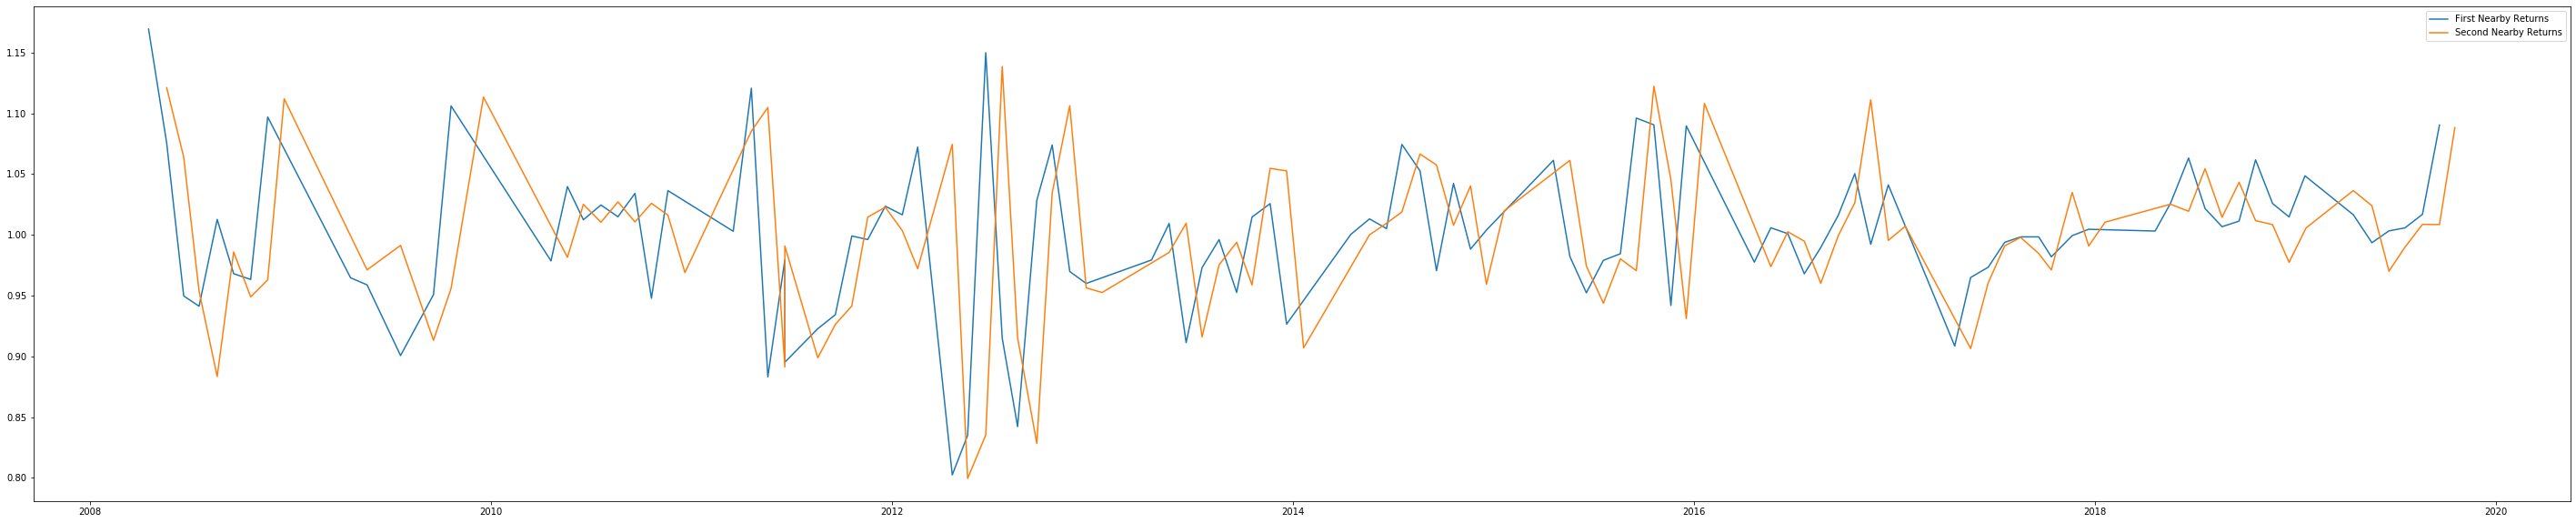

In [ ]:
fig= plt.figure(figsize=(50,10))
plt.plot(dffinal[9:112]["Expiry1"],dffinal[9:112]["LongLeg"], label = "First Nearby Returns")
plt.plot(dffinal[9:112]["Expiry2"],dffinal[9:112]["ShortLeg"], label = "Second Nearby Returns")
plt.legend()

In [ ]:
print("Return on long leg:" , (dffinal[9:112]["LongLeg"].product() - 1) * 100, "%")
print("Return on short leg:" , (dffinal[9:112]["ShortLeg"].product() - 1) * 100, "%")
print("Returns = Return on Long Leg - Return on Short Leg = ", (dffinal[9:112]["LongLeg"].product() - 1)*100 - (dffinal[9:112]["ShortLeg"].product() - 1)*100, "%" )
print("Standard Deviation of long leg:", np.std( dffinal[9:112]["LongLeg"]))
print("Standard Deviation of short leg:", np.std( dffinal[9:112]["ShortLeg"]))
print("Correlation in returns of both legs", dffinal[9:112]["LongLeg"].corr(dffinal[9:112]["ShortLeg"]) * 100, "%")

Return on long leg: -20.785388036946085 %
Return on short leg: -25.618463719867723 %
Returns = Return on Long Leg - Return on Short Leg =  4.833075682921638 %
Standard Deviation of long leg: 0.060398595221847776
Standard Deviation of short leg: 0.06222110497454983
Correlation in returns of both legs 92.67186800938835 %
